# Converting dataset from text to images 

This file converts the dataset that we got in the form of text files to images. 

### Function to extract the X and Y values

Below is the function to extract x and y values from the file and then put them in a list. 

In [ ]:
%pip install PyQt5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 8.4 MB 5.1 MB/s 
     |████████████████████████████████| 344 kB 46.2 MB/s 
     |████████████████████████████████| 59.9 MB 1.2 MB/s 


Streaming output truncated to the last 5000 lines.
Parsing the file : 125.19.txt
Parsing the file : 126.19.txt
Parsing the file : 127.19.txt
Parsing the file : 128.19.txt
Parsing the file : 129.19.txt
Parsing the file : 130.19.txt
Parsing the file : 131.19.txt
Parsing the file : 132.19.txt
Parsing the file : 133.19.txt
Parsing the file : 134.19.txt
Parsing the file : 135.19.txt
Parsing the file : 136.19.txt
Parsing the file : 137.19.txt
Parsing the file : 138.19.txt
Parsing the file : 139.19.txt
Parsing the file : 140.19.txt
Parsing the file : 141.19.txt
Parsing the file : 142.19.txt
Parsing the file : 143.19.txt
Parsing the file : 144.19.txt
Parsing the file : 145.19.txt
Parsing the file : 64.19.txt
Parsing the file : 68.19.txt
Parsing the file : 82.19.txt
Parsing the file : 91.19.txt
Parsing the file : 105.19.txt
Parsing the file : 110.19.txt
Parsing the file : 118.19.txt
Parsing the file : 146.19.txt
Parsing the file : 147.19.txt
Parsing the file : 148.19.txt
Parsing the file : 149.

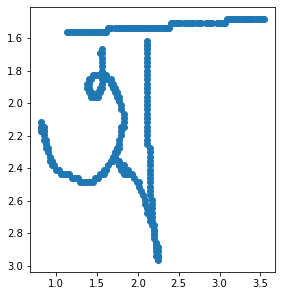

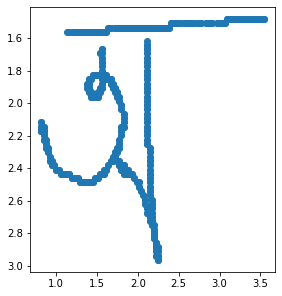

In [ ]:

import matplotlib.pyplot as plt
import sys
import os

lines = []
substrings = ['PEN_DOWN', 'PEN_UP']
X_VALUES = []
Y_VALUES = []


path = '/content/drive/MyDrive/final_year_project/assamese_characters/my_dataset/'
files = os.listdir(path)

def parse_file(fileName) : 
  # read file
  print("Parsing the file : " + fileName)
  with open(fileName, 'r') as fp:
    # read and store all lines into list
    lines = fp.readlines()
    
  lstIdx = len(lines) - 2
    
  # Write file 
  # also remove 'PEN_DOWN' and 'PEN_UP'
  with open(r"1.2.txt", 'w') as fp:
    # iterate each line
    for number, line in enumerate(lines):
        if number not in [0,1,2,3, lstIdx, lstIdx+1, lstIdx+2]: 
          if not any(substring in line for substring in substrings):
            fp.write(line)
  # Now read the next file to get the x and y values 
  # after you split the string into spaces and considering
  # only first two objects from there 

  with open(r"1.2.txt", 'r') as fp: 
  # consider one line 
    for line in fp:
      objects = line.split()
      X_VALUES.append(objects[0])
      Y_VALUES.append(objects[1])

  # find the dpi of screen 
  dpi = 1000
  new_x_values = [int(x) / dpi for x in X_VALUES]
  new_y_values = [int(y) / dpi for y in Y_VALUES]

  # we have X values & Y values 
  # plot them now 
  f = plt.figure()
  f.set_figwidth(4392/dpi)
  f.set_figheight(4868/dpi)
  plt.scatter(new_x_values, new_y_values)
  plt.gca().invert_yaxis()
  plt.savefig(fileName, bbox_inches="tight",
            pad_inches=0.3, transparent=False)

# rotate 180 degrees and then flip along the y axis to get the image

# there are 45 directories "W1" ... "W45"
# just mention W and append 1 to 45 
for i in range(1, 46) : 
  pth = path + 'W' + str(i)
  # now read the files in those directories 
  for textFile in os.listdir(pth): 
    try : 
      parse_file(textFile)
    except : 
      pass

